In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from util import get_data, plot_data
%matplotlib inline

In [249]:
sd = dt.datetime(2008,1,1)
ed = dt.datetime(2009,5,1)
syms = ['JPM']
sv=100000

# Read in adjusted closing prices for given symbols, date range
dates = pd.date_range(sd, ed)
prices_all = get_data(syms, dates)  # automatically adds SPY
price = prices_all[syms]            # only portfolio symbols  
price = price / price.iloc[0]

## Simple Moving Average

In [250]:
window_size = 20
k = 2
sma = price.rolling(window_size).mean()

df = pd.concat([price, sma, price/sma],\
                        keys = ['Price', 'SMA', 'Price/SMA'],\
                        axis = 1)

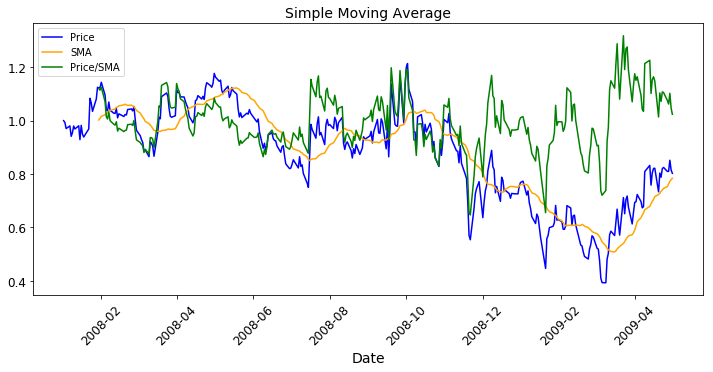

In [251]:
df.dropna()
fig = plt.figure(figsize=(12,5))
plt.title('Simple Moving Average', size = 14)
plt.plot(df.index,df.Price, linestyle='-',color='blue')
plt.plot(df.index,df.SMA, linestyle='-',color='orange')
plt.plot(df.index,df.Price/df.SMA, linestyle='-',color='green')
plt.legend(["Price","SMA","Price/SMA"])
plt.xticks(rotation=45, size=12) 
plt.yticks(size=12)          
plt.xlabel('Date', size=14)
plt.ylabel('')
#fig.set_tight_layout(True)
plt.show()

## Bollinger Bands

In [252]:
 #calc bb value
rstd = price.rolling(window_size).std()
bb = (price - sma) / (2*rstd)
upper_b = sma + k*rstd
lower_b = sma - k*rstd

df_bb = pd.concat([price, sma, upper_b, lower_b],\
                        keys = ['Price', 'SMA', 'Upper_BB', 'Lower_BB'],\
                        axis = 1)
#df_bb.dropna()

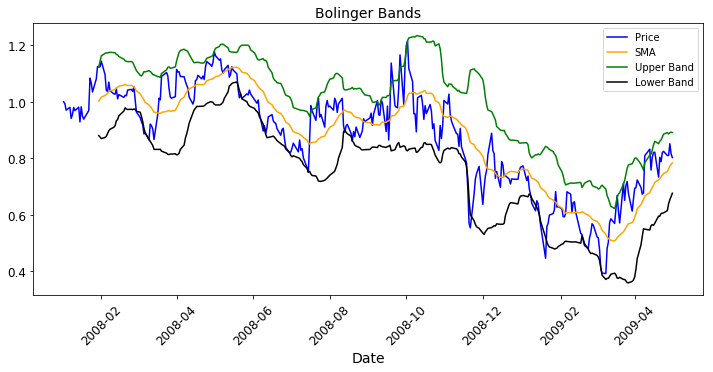

In [253]:
fig = plt.figure(figsize=(12,5))
plt.plot(df_bb.index,df_bb.Price, linestyle='-',color='blue')
plt.plot(df_bb.index,df_bb.SMA, linestyle='-',color='orange')
plt.plot(df_bb.index,df_bb.Upper_BB, linestyle='-',color='green')
plt.plot(df_bb.index,df_bb.Lower_BB, linestyle='-',color='black')
#plt.plot(df_bb.index,df_bb.BB, linestyle='-',color='cyan')
plt.title('Bolinger Bands', size=14)
plt.legend(["Price","SMA","Upper Band", 'Lower Band'])
plt.xticks(rotation=45, size=12) 
plt.yticks(size=12)          
plt.xlabel('Date', size=14)
plt.ylabel('')
#fig.set_tight_layout(True)
plt.show()

In [254]:
# calc momentum
delta = 20
momentum = price / price.shift(delta) - 1

In [255]:

df_m = pd.concat([price,momentum,sma],\
                        keys = ['Price','Momentum', 'SMA'],\
                        axis = 1)

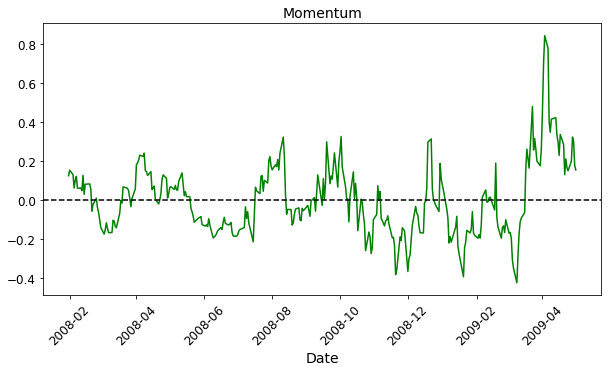

In [256]:
fig = plt.figure(figsize=(10,5))
#plt.plot(df_m.index,df_m.Price, linestyle='-',color='blue')
#plt.plot(df_m.index,df_m.SMA, linestyle='-',color='orange')
plt.plot(df_m.index,df_m.Momentum, linestyle='-',color='green')
plt.axhline(y=0.0, color='black', linestyle='--')
plt.title('Momentum', size=14)
#plt.legend(["Price","SMA","Momentum"])
plt.xticks(rotation=45, size=12) 
plt.yticks(size=12)          
plt.xlabel('Date', size=14)
plt.ylabel('')
#fig.set_tight_layout(True)
plt.show()

In [262]:
#get sddr = volatility
daily_r = price / price.shift(1) - 1.00
sddr = daily_r.std()
vol = sddr

In [264]:
len(vol)

1

In [263]:
df_vol = pd.concat([price,sma],\
                        keys = ['Price','SMA', 'Volatility'],\
                        axis = 1)


In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(df_vol.index,df_vol.Price, linestyle='-',color='blue')
plt.plot(df_vol.index,df_vol.SMA, linestyle='-',color='orange')
plt.plot(df_vol.index,df_vol.Volatility, linestyle='-',color='green')
#plt.axhline(y=0.0, color='black', linestyle='--')
plt.title('Volatility', size=14)
plt.legend(["Price","SMA","Volatility"])
plt.xticks(rotation=45, size=12) 
plt.yticks(size=12)          
plt.xlabel('Date', size=14)
plt.ylabel('')
#fig.set_tight_layout(True)
plt.show()